In [1]:
import scipy as sp
import scipy.linalg as sla
import pylab as pl
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import cv2

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Сжатие информации с помощью SVD


Фотография цветная, поэтому для начала разделим её на 3 спектра - красный, зеленый, синий. Каждый спектр можно проинтепролировать, как матрицу, каждый элемент которой будет определять насыщенность цвета каждого из пикселей. Итого для каждого из цветов получаем отдельную матрицу, т.е. всего 3 матрицы.

Идея заключается в том, чтобы построить сингулярное разложение каждой матрицы и найти в ней такое количество элементов, которое несет в себе основную информацию о цвете и убрать остальные элементы для сжатия файла без заметной потери качества картинки. После выполнения данных операций необходимо объединить получившиеся спектры, и по итогу мы должны получить изображение в тех же цветах, но с незначительной потерей качества изображения, что должно довольно сильно отразиться на размере самого файла.


Загрузим изображение

In [2]:
from PIL import Image
import imageio

Разбиваем на спектры

In [87]:
img = cv2.imread('lion_1.jpg')
r, g, b = cv2.split(img)

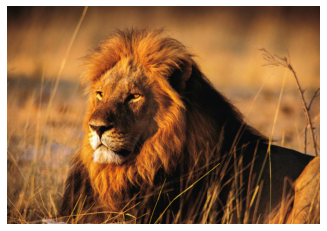

In [89]:
rev_img = img[:, :, ::-1]

ax = plt.gca()
plt.axis('off')

plt.imshow(rev_img);

Проверим, что при слиянии спектров получим исходную картинку

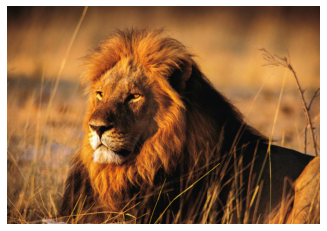

In [34]:
merge_image = cv2.merge([r,g,b])
rev_merge = merge_image[:, :, ::-1]

ax = plt.gca()
plt.axis('off')

plt.imshow(rev_merge);

Создадим функцию для сингулярного разложения

In [9]:
def ImageWithSomeComponents(comp_begin, comp_end, img):
    U, D, V = sla.svd(img, full_matrices = True)
    Diag = np.zeros((U.shape[0], V.shape[0]))
    for i in range(comp_begin, comp_end):
        Diag[i][i] = D[i]
    Diag = np.dot(U, Diag)
    Diag = np.dot(Diag, V)
    return Diag

Проанализируем матрицу для красного спектра. 

Для удобства визуального анализа качества будем отображать получившиеся спектры в оттенках серого.

In [13]:
U, D, V = sla.svd(r, full_matrices = True)
print(U.shape)
print(D.shape)
print(V.shape)

(577, 577)
(577,)
(830, 830)


In [14]:
print(D)

[3.47403359e+04 8.43661133e+03 5.92594434e+03 4.03868481e+03
 3.56812671e+03 2.92525269e+03 2.42806836e+03 2.24124438e+03
 1.95433728e+03 1.80432092e+03 1.56379846e+03 1.41376514e+03
 1.40142749e+03 1.34033960e+03 1.29500720e+03 1.17041309e+03
 1.04756775e+03 9.84724060e+02 9.39458679e+02 9.16314209e+02
 8.38093933e+02 8.30841553e+02 8.22959106e+02 7.96902161e+02
 7.46120239e+02 7.17808594e+02 7.04415588e+02 6.71152222e+02
 6.60007690e+02 6.18434448e+02 5.99879639e+02 5.81101440e+02
 5.77515808e+02 5.56747437e+02 5.52465515e+02 5.47796326e+02
 5.33426453e+02 5.04132721e+02 4.96619507e+02 4.87262024e+02
 4.75258575e+02 4.64024567e+02 4.55757263e+02 4.48409973e+02
 4.45496857e+02 4.38994598e+02 4.33427185e+02 4.29247650e+02
 4.26491852e+02 4.16752228e+02 4.10188416e+02 4.04292084e+02
 3.93617645e+02 3.92941132e+02 3.87105591e+02 3.84736206e+02
 3.78922791e+02 3.74909332e+02 3.72410034e+02 3.65619934e+02
 3.61460907e+02 3.58830231e+02 3.57610840e+02 3.50944794e+02
 3.49723999e+02 3.468203

Посмотрим, каков будет результат при выводе первых нескольких компонент

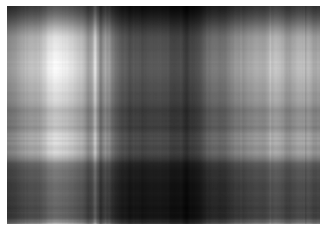

In [36]:
plt.gray()
imgplot = plt.imshow(ImageWithSomeComponents(0, 1, r))

ax = plt.gca()
plt.axis('off')

plt.show()

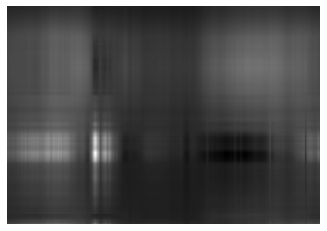

In [37]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 2, r))

ax = plt.gca()
plt.axis('off')

plt.show()

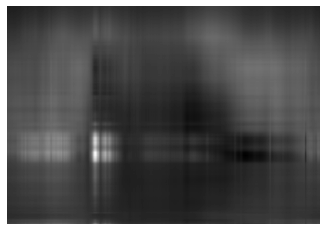

In [38]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 3, r))

ax = plt.gca()
plt.axis('off')

plt.show()

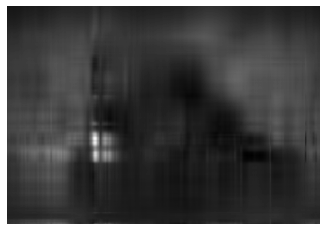

In [39]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 5, r))

ax = plt.gca()
plt.axis('off')

plt.show()

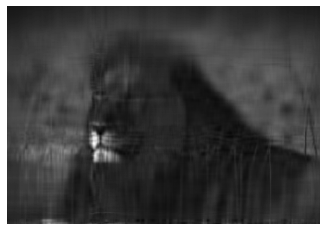

In [40]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 15, r))

ax = plt.gca()
plt.axis('off')

plt.show()

Довольно размыто, но уже видны очертания того, что мы хотели бы увидеть. Попробуем первые $40$ компонент

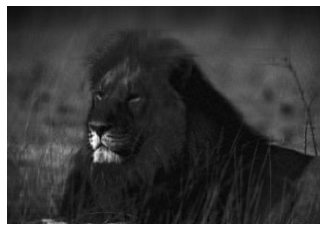

In [41]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 40, r))

ax = plt.gca()
plt.axis('off')

plt.show()

Уже гораздо лучше, сравним с исходным красным спектром изображения.

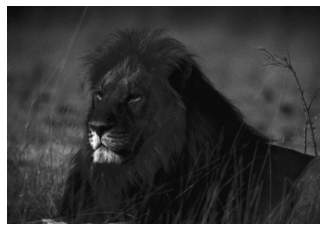

In [52]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 577, r))

ax = plt.gca()
plt.axis('off')

plt.show()

Можно заметить, что фото значительно потеряло в качестве.

Посмотрим, может, за качество и реалистичность фотографии отвечают другие компоненты? Выведем с $15$-й по $200$-ю

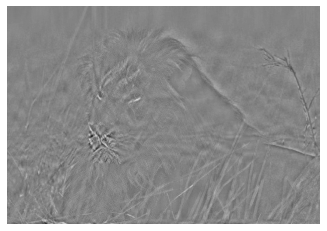

In [55]:
imgplot = plt.imshow(ImageWithSomeComponents(14, 200, r))

ax = plt.gca()
plt.axis('off')

plt.show()

Как можно заметить информации о цвете в этих компонентах мало. В большей степени они содержат информацию о контурах и четкости изображения. 

Выведем с $15$-й по последнюю компоненту.

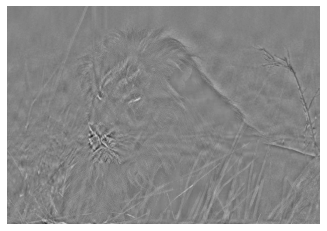

In [56]:
imgplot = plt.imshow(ImageWithSomeComponents(14, U.shape[0], r))

ax = plt.gca()
plt.axis('off')

plt.show()

Практически ничего не изменилось. Это означает, что в первых $15$ компонентах "хранится" почти вся информация о цвете. При этом при самом сжатии нужно оставить столько элементов, чтобы помимо сохранения цвета четкость изображения уменьшалась минимально.

Теперь выведем с $7$-й по последнюю

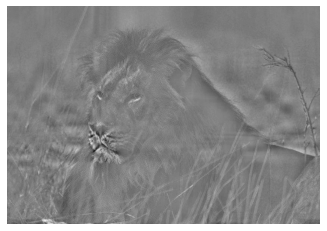

In [59]:
imgplot = plt.imshow(ImageWithSomeComponents(6, U.shape[0], r))

ax = plt.gca()
plt.axis('off')

plt.show()

Изображение получилось гораздо хуже исходного. Значит, несмотря на неудачу с первой компонентой, первые $5-6$ компонент содержат очень большую информацию. Потеряв их, мы практически потеряем качественное изображение, оно превратится в силуэт.

Ранее мы поняли, что последние компоненты очень мало влияют на изображение. Посмотрим, сколько компонент можно откинуть.

Выведем с $1$-й по $50$-ю

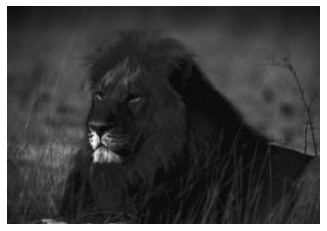

In [60]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 50, r))

ax = plt.gca()
plt.axis('off')

plt.show()

Видно, что присутствует некоторая размытость. Попробуем побольше. Выведем с первой по $250$-ю

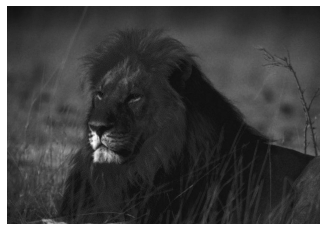

In [64]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 250, r))

ax = plt.gca()
plt.axis('off')

plt.show()

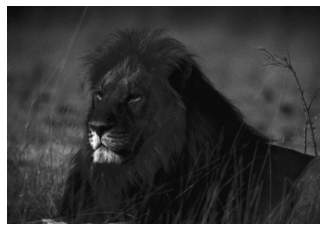

In [65]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 577, r))

ax = plt.gca()
plt.axis('off')

plt.show()

Изображение теперь довольно трудно отличить от исходного. Можно говорить о том, что оно практически не потеряло в качестве.

Теперь выполним те же действия для зеленого спектра.

In [66]:
U, D, V = sla.svd(g, full_matrices = True)
print(U.shape)
print(D.shape)
print(V.shape)

(577, 577)
(577,)
(830, 830)


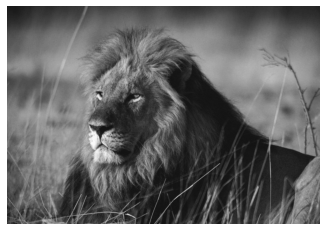

In [67]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 250, g))

ax = plt.gca()
plt.axis('off')

plt.show()

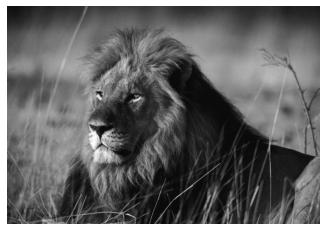

In [68]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 577, g))

ax = plt.gca()
plt.axis('off')

plt.show()

In [69]:
U, D, V = sla.svd(b, full_matrices = True)
print(U.shape)
print(D.shape)
print(V.shape)

(577, 577)
(577,)
(830, 830)


Теперь для синего спектра.

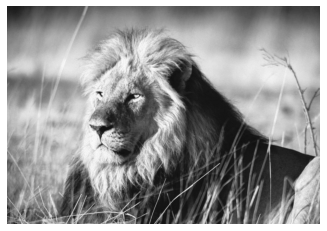

In [70]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 250, b))

ax = plt.gca()
plt.axis('off')

plt.show()

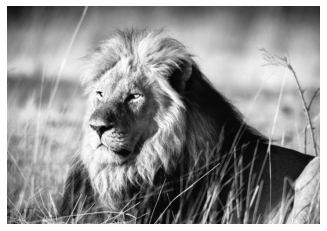

In [71]:
imgplot = plt.imshow(ImageWithSomeComponents(0, 577, b))

ax = plt.gca()
plt.axis('off')

plt.show()

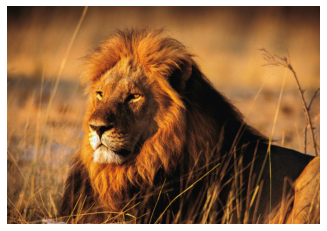

In [72]:
r_comp = ImageWithSomeComponents(0, 250, r)
g_comp = ImageWithSomeComponents(0, 250, g)
b_comp = ImageWithSomeComponents(0, 250, b)

merge_image = cv2.merge([r_comp,g_comp,b_comp])
rev_merge = merge_image[:, :, ::-1]

ax = plt.gca()
plt.axis('off')

plt.imshow(rev_merge.astype('uint8'));

plt.savefig('lion_result.jpg', bbox_inches = 'tight', dpi = 200)

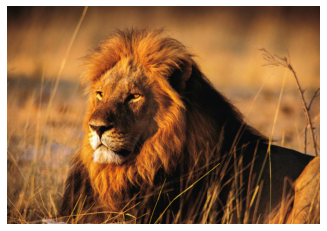

In [91]:
ax = plt.gca()
plt.axis('off')

plt.imshow(rev_img);
plt.savefig('lion_pre_result.jpg', bbox_inches = 'tight')

Если оценить размер исходного файла и после сжатия, то получим следующее:

1) Исходный файл: 160 kB

2) Сжатый файл: 75 кB

Можно заметить, что размер файла сжался более, чем в 2 раза. При этом качество картинки визуально отличить сложно. 

Однако можно заметить, что в выведенном файле присутствует несколько битых пикселей на левой стороне морды льва (в той части, где растут усы). Это может быть из-за того, что исходная картинка была в низкого качества. В нашем случае это картинка в разрешении dpi 200. 

Проверим, какими будут результаты при сжатии картинки в высоком разрешении. В первом случае мы оставили 250 компонент из 577, то есть округленно 40% от всех компонент. Попробуем сделать то же самое для качественной картинки. 

Также для наглядности скомпануем наш получившийся код.

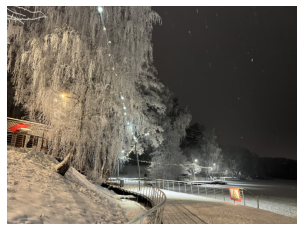

In [92]:
img = cv2.imread('Winter.jpg')
r, g, b = cv2.split(img)

rev_img = img[:, :, ::-1]

ax = plt.gca()
plt.axis('off')

plt.imshow(rev_img);

In [75]:
def ImageWithSomeComponents(comp_begin, comp_end, img):
    U, D, V = sla.svd(img, full_matrices = True)
    Diag = np.zeros((U.shape[0], V.shape[0]))
    for i in range(comp_begin, comp_end):
        Diag[i][i] = D[i]
    Diag = np.dot(U, Diag)
    Diag = np.dot(Diag, V)
    return Diag

In [81]:
Ur, Dr, Vr = sla.svd(r, full_matrices = True)
Ug, Dg, Vg = sla.svd(g, full_matrices = True)
Ub, Db, Vb = sla.svd(b, full_matrices = True)

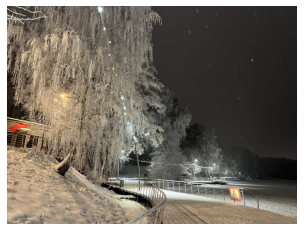

In [98]:
r_comp = ImageWithSomeComponents(0, int(0.8*Ur.shape[0]), r)
g_comp = ImageWithSomeComponents(0, int(0.8*Ug.shape[0]), g)
b_comp = ImageWithSomeComponents(0, int(0.8*Ub.shape[0]), b)

merge_image = cv2.merge([r_comp,g_comp,b_comp])
rev_merge = merge_image[:, :, ::-1]

ax = plt.gca()
plt.axis('off')

plt.imshow(rev_merge.astype('uint8'));

plt.savefig('Winter_result.jpg', bbox_inches = 'tight', dpi = 1200)

Как можно заметить итоговый файл стал занимать меньше места, однако в данном случае нам пришлось оставить 80% от всех компонент для получения приемлемого качества после сжатия. Это связано с тем, что на данной фотографии очень много белого цвета, который по факту является смешением всех цветов и при уменьшении интенсивности какого-либо спектра (R, G или B) наблюдается искажение цветовой палитры.

Следовательно данный метод сжатия не является универсальным для цветных изображений, т.к. для каждой отдельной картинки необходимо индивидуально подбирать то количество компонент, которое нам необходимо оставить.

Опробуем данную методику для черно-белых изображений. В этом случае нам нужно будет лишь работать с одним спектром, интенсивностью оттенка серого.

В качестве исходного изображения будем использовать ту же самую фотографию, но в черно-белом фильтре.

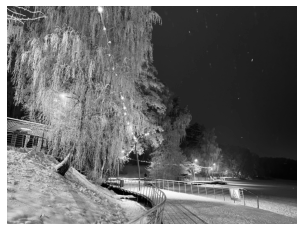

In [110]:
img = cv2.imread('Winter_BW.jpg')[:,:,0]

ax = plt.gca()
plt.axis('off')

plt.imshow(img);

In [111]:
U, D, V = sla.svd(img, full_matrices = True)

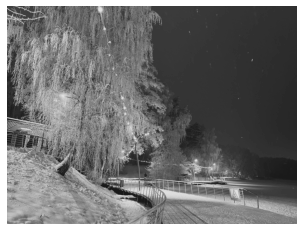

In [116]:
imgplot = plt.imshow(ImageWithSomeComponents(0, int(0.4*U.shape[0]), img))

ax = plt.gca()
plt.axis('off')

plt.savefig('Winter_BW_result.jpg', bbox_inches = 'tight', dpi = 1200)

plt.show();

В примере с черно-белой фотографией можно заметить, что мы оставили в 2 раза меньше компонент по сравнению с цветным вариантом, при этом не получили каких-либо битых пикселей. Однако при этом сильно пострадала четкость изображения.

Попробуем оставить больше компонент, для того, чтобы наблюдался эффект сжатия, при незначительном изменении четкости картинки.

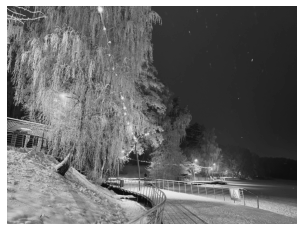

In [117]:
imgplot = plt.imshow(ImageWithSomeComponents(0, int(0.6*U.shape[0]), img))

ax = plt.gca()
plt.axis('off')

plt.savefig('Winter_BW_result_2.jpg', bbox_inches = 'tight', dpi = 1200)

plt.show();

Теперь изображение стало не так сильно отличаться от исходного, при этом вес самого файла стал сильно меньше (2,38 MB вместо 4,13 MB).

# Вывод

В целом, можно сделать вывод о том, что сжатие изображений методом синглуряного разложения работает неплохо, но в случае с RGB изображениями необходимо правильно подобрать то количество компонент, которое нам необходимо оставить. И как показывают результаты, это количество зависит от индивидуальных особенностей каждого отдельного изображения (исходное разрешение, цветовая палитра, четкость и др.)